In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick
# we import funcanimation from the matplotlib library
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap, TwoSlopeNorm
from IPython.display import HTML

In [2]:
# we download daily price data from yahoo finance
# we use the adjusted close price

# we download the data for the following tickers
# we use the following tickers SPY

import yfinance as yf

# we download the data for the following tickers: SPY

spy = yf.Ticker("SPY")
spy_df = spy.history(period="max")
spy_df = spy_df.reset_index()
spy_df = spy_df[["Date", "Close"]]

# spy_df.head()


# we get the daily returns
spy_df["spy_daily_return"] = spy_df["Close"].pct_change()
spy_df = spy_df.dropna()
spy_df['spy_daily_log_return'] = np.log(spy_df["spy_daily_return"] )
spy_df['spy_daily_log1_return'] = np.log1p(spy_df["spy_daily_return"] )

# # we plot the daily returns
# spy_df.plot(x="Date", y="daily_log_return", title="SPY Daily Log Returns", figsize=(12, 8), alpha=0.5)
# # we overlay the daily returns in red
# spy_df.plot(x="Date", y="daily_return", title="SPY Daily Returns", figsize=(12, 8), color="red", alpha=0.5)
# plot the daily returns and the daily log returns on the same plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=spy_df["Date"], y=spy_df["spy_daily_return"], mode='lines', name='daily_return'))    
fig.add_trace(go.Scatter(x=spy_df["Date"], y=spy_df["spy_daily_log_return"], mode='lines', name='daily_log_return'))
fig.add_trace(go.Scatter(x=spy_df["Date"], y=spy_df["spy_daily_log1_return"], mode='lines', name='daily_log1_return'))
fig.update_layout(title="SPY Daily Returns and Log Returns", xaxis_title="Date", yaxis_title="Returns")
fig.show()



c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Github\repos\swanhunt\.conda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Github\repos\swanhunt\.conda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


c:\Github\repos\swanhunt\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

c:\Github\repos\swanhunt\.conda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

c:\Github\repos\swanhunt\.conda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log



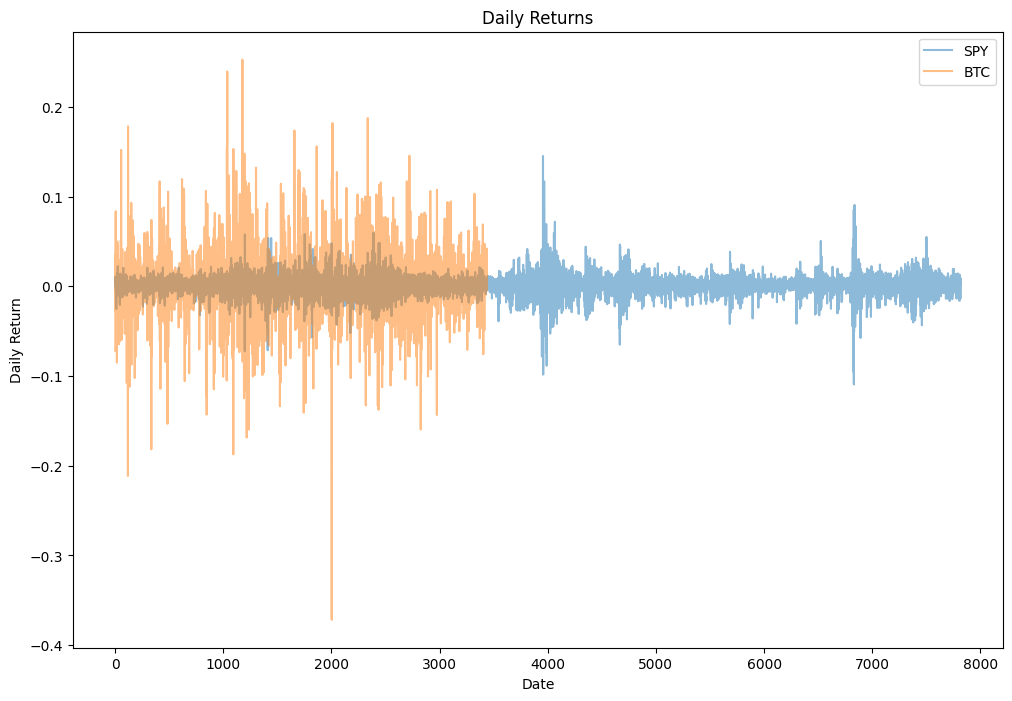

In [3]:
# we get BTC price data from yahoo finance
btc = yf.Ticker("BTC-USD")
btc_df_source = btc.history(period="max")
btc_df_source = btc_df_source.reset_index()
btc_df_source = btc_df_source[["Date", "Close"]]
# btc_df_source.head()
# we get the daily returns
btc_df_source["btc_daily_return"] = btc_df_source["Close"].pct_change()
btc_df_source['btc_daily_log_return'] = np.log(btc_df_source["btc_daily_return"])
btc_df_source['btc_daily_log1_return'] = np.log1p(btc_df_source["btc_daily_return"])

# we plot the daily returns of BTC next to the daily returns of SPY on same plot red and blue
spy_df["spy_daily_return"].plot(figsize=(12, 8), label="SPY", alpha=0.5)
btc_df_source["btc_daily_return"].plot(figsize=(12, 8), label="BTC", alpha=0.5)
plt.legend()
# we add title and axis labels
plt.title("Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

In [4]:
# we merge the two dataframes on the date column
# we make both date columns date only
spy_df["Date"] = spy_df["Date"].dt.date
btc_df_source["Date"] = btc_df_source["Date"].dt.date

merged_df = pd.merge(spy_df, btc_df_source, on="Date")
# we drop the na values
merged_df = merged_df.dropna()
# we only keep the daily returns columns
# merged_df = merged_df[["Date", "spy_daily_return", "btc_daily_return"]]
# we rename the columns Close_x and Close_y to spy_close and btc_close
merged_df = merged_df.rename(columns={"Close_x": "spy_close", "Close_y": "btc_close"})
merged_df.head()

Date   spy_close  spy_daily_return  spy_daily_log_return  \
15  2014-10-08  166.408676          0.017490             -4.046142   
19  2014-10-14  158.843079          0.001548             -6.471021   
22  2014-10-17  159.494720          0.011811             -4.438741   
24  2014-10-21  164.233765          0.019811             -3.921528   
29  2014-10-28  167.906525          0.011470             -4.467994   

    spy_daily_log1_return   btc_close  btc_daily_return  btc_daily_log_return  \
15               0.017339  352.940002          0.049832             -2.999091   
19               0.001546  400.869995          0.026782             -3.620032   
22               0.011742  383.757996          0.003142             -5.762892   
24               0.019617  386.475006          0.009482             -4.658396   
29               0.011405  357.618011          0.013114             -4.334097   

    btc_daily_log1_return  
15               0.048630  
19               0.026429  
22               0.003137  
24               0.009437  
29               0.013028

In [5]:
# we add yearly return column by calculating the div between each same date from the previous year
for row in merged_df.itertuples():
    date = row.Date
    year_ago = date - 365 * pd.to_timedelta(1, unit='D')
    # we look for the closest date in the past to year_ago
    year_ago_spy = merged_df[merged_df['Date'] < year_ago]['Date'].max()
    year_ago_btc = merged_df[merged_df['Date'] < year_ago]['Date'].max()
    # print(date, year_ago_spy, year_ago_btc)
    
    try:
        merged_df.loc[row.Index, 'spy_yearly_return'] = merged_df[merged_df['Date'] == date]['spy_close'].values[0] / merged_df[merged_df['Date'] == year_ago_spy]['spy_close'].values[0]-1
    except:
        merged_df.loc[row.Index, 'spy_yearly_return'] = np.nan

    try:
        merged_df.loc[row.Index, 'btc_yearly_return'] = merged_df[merged_df['Date'] == date]['btc_close'].values[0] / merged_df[merged_df['Date'] == year_ago_btc]['btc_close'].values[0]-1
    except:
        merged_df.loc[row.Index, 'btc_yearly_return'] = np.nan


merged_df.tail(5)

Date   spy_close  spy_daily_return  spy_daily_log_return  \
2363  2024-02-07  498.100006          0.008340             -4.786643   
2364  2024-02-08  498.320007          0.000442             -7.724923   
2365  2024-02-09  501.200012          0.005779             -5.153450   
2368  2024-02-14  498.570007          0.009088             -4.700840   
2369  2024-02-15  501.019989          0.004914             -5.315663   

      spy_daily_log1_return     btc_close  btc_daily_return  \
2363               0.008306  44318.222656          0.028631   
2364               0.000442  45301.566406          0.022188   
2365               0.005763  47147.199219          0.040741   
2368               0.009047  51826.695312          0.041901   
2369               0.004902  52073.789062          0.004768   

      btc_daily_log_return  btc_daily_log1_return  spy_yearly_return  \
2363             -3.553270               0.028229           0.230941   
2364             -3.808192               0.021946           0.218463   
2365             -3.200519               0.039933           0.225505   
2368             -3.172448               0.041047           0.226044   
2369             -5.345893               0.004756           0.232068   

      btc_yearly_return  
2363           0.868094  
2364           0.947258  
2365           1.026591  
2368           1.376488  
2369           1.387819

In [6]:
def get_pdf(data, bins, min_x=-0.4, max_x=0.4, swan_size=0, swan_frequency=0):
    bin_edges = np.linspace(min_x, max_x, bins + 1)  # bins + 1 because np.linspace includes both ends
    clipped_data = np.clip(data, min_x, max_x)  # Clip the data to the range
    counts, _ = np.histogram(clipped_data, bins=bin_edges, density=True)  # Use density=True for PDF

    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    bin_width = bin_edges[1] - bin_edges[0]  # Width of each bin
    # we normalize the counts
    counts = counts / counts.sum()



    # # we make the first count element = swan_frequency
    # if swan_frequency > 0:
    #             # we locate the bin_edges that are closest to the swan_size
    #     swan_bin = np.argmin(np.abs(bin_centers - (swan_size)))
    #     print('closest bin center to swan_size:', bin_centers[swan_bin])
    #     counts[swan_bin] = swan_frequency
    
    # counts = counts / counts.sum()

    return bin_centers, counts, bin_width

def find_month_starts(df, num_months=24):
    end_date = df['Date'].max()
    start_date = end_date - pd.DateOffset(months=num_months)
    month_starts = pd.date_range(start=start_date, end=end_date, freq='MS')
    # make sure the date is a datetime and not a timestamp
    month_starts = month_starts.to_pydatetime()
    # print(month_starts)
    return month_starts

def percentage_formatter(x, pos):
    return '{:0.0f}%'.format(x*100)

In [161]:
# we manually inject a catastrophic event in the spy returns and the btc returns
# we hide warnings
import warnings
warnings.filterwarnings('ignore')


def update8(date, min_x=-0.4, max_x=0.4, y_max=1, bins=50, swan_size=0, swan_frequency=0):
        # Ensure the 'Date' column is in datetime format
    merged_df['Date'] = pd.to_datetime(merged_df['Date'])

    # Convert 'date' to pandas.Timestamp
    # Assuming 'date' is defined, convert it like this
    date = pd.to_datetime(date)

    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax5.clear()
    ax6.clear()

    # ax1.set_yscale('log')
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')
    # ax4.set_xscale('log')
    # ax2.set_xscale('log')

    month_data_spy = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['spy_yearly_return']

    if not month_data_spy.empty:
        bin_centers_spy_0, counts_spy_0, bin_width_spy = get_pdf(month_data_spy, bins, min_x, max_x, swan_size, swan_frequency)

        bin_centers_spy = bin_centers_spy_0.tolist()
        counts_spy = counts_spy_0.tolist()
        if swan_frequency > 0:
            swan_size = 1- 1e-24 if swan_size == -1 else swan_size
            bin_centers_spy.append((swan_size))
            counts_spy.append(swan_frequency)
            # we normalize the array_2
            counts_spy = np.array(counts_spy) / np.sum(counts_spy)



        # we annualize the returns
        # bin_centers_spy = np.log1p(bin_centers_spy)
        ax1.bar(bin_centers_spy, counts_spy, width=bin_width_spy, align='center')  # align='center' to center the bars
        ax1.set_title(f"SPY PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax1.set_xlim(min_x, max_x)
        ax1.set_ylim(0.001, y_max)
        ax1.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        print('bin centers: ', bin_centers_spy)
        mean_spy = np.dot(bin_centers_spy, counts_spy)
        mean_spy_text = mean_spy * 100
        ax1.axvline(x=mean_spy, color='g' if mean_spy > 0 else 'r', linestyle='--', label='Mean return')
        ax1.text(mean_spy, 0.1, f"Mean: {mean_spy_text:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_spy > 0 else 'r')
        ax1.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

        # bin_centers_spy = np.log1p(bin_centers_spy)

        bin_centers_spy = np.log1p(bin_centers_spy).tolist()
        counts_spy = counts_spy.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_spy.append(np.log1p(swan_size))
            counts_spy.append(swan_frequency)
            # we normalize the array_2
            counts_spy = np.array(counts_spy) / np.sum(counts_spy)




        ax3.bar(bin_centers_spy, counts_spy, width=bin_width_spy, align='center')  # align='center' to center the bars
        ax3.set_title(f"SPY PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax3.set_xlim(min_x, max_x)
        ax3.set_ylim(0.001, y_max)
        ax3.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_spy = np.dot(bin_centers_spy, counts_spy)
        mean_spy = np.expm1(mean_spy)
        ax3.axvline(x=mean_spy, color='g' if mean_spy > 0 else 'r', linestyle='--', label='Mean return')
        mean_spy = mean_spy * 100
        # mean_spy_text = mean_spy
        ax3.text(mean_spy/100, 0.1, f"Mean: {mean_spy:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_spy > 0 else 'r')
        ax3.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))



        fr = np.linspace(0,1,50)
        # print('here are fr: ',fr)
        bin_centers_spy, counts_spy, bin_width_spy = get_pdf(month_data_spy, bins, min_x, max_x, swan_size, swan_frequency)
        # print('bin centers ', bin_centers_spy)
       
        exp_g_array = []
        for f in fr:
            bin_centers_spy_f = bin_centers_spy * f
            # print('bin centers post times f: ', bin_centers_spy_f)
            # print('counts_spy: ', counts_spy)
            # print('log1p bin centers', np.log1p(bin_centers_spy_f))
            bin_c = np.log1p(bin_centers_spy_f).tolist()
            counts = counts_spy.tolist()
            if swan_frequency > 0:
                swan_size = 1- 1e-24 if swan_size == -1 else swan_size
                # print('swan size: ', swan_size*f)
                bin_c.append(np.log1p(swan_size*f))
                # print('appended log1p swan size: ', np.log1p(swan_size*f))
                counts.append(swan_frequency)
                # print('appended swan frequency: ', swan_frequency)
                # we normalize the array_2
                counts = np.array(counts) / np.sum(counts)
            exp_g = np.dot(bin_c, counts)
            exp_g = np.expm1(exp_g)
            exp_g_array.append(exp_g)
        
        # print('exp g array: ', exp_g_array)
        # import matplotlib.pyplot as plt
        from scipy.ndimage import gaussian_filter1d
        # we smooth the exp_g_array
        exp_g_array = gaussian_filter1d(exp_g_array, sigma=0.5)
        ax5.plot(fr, exp_g_array)  # Fix: Change ax5.line() to ax5.plot()
        ax5.set_title(f"Expected G as function of fraction")
        ax5.set_xlim(0, 1)
        # ax5.set_ylim(0, 1)
        ax5.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        max_g = np.max(exp_g_array)
        max_f = fr[np.argmax(exp_g_array)]
        ax5.axvline(x=max_f, color='g', linestyle='--', label='Max G')
        ax5.text(max_f, max_g if max_g < 1 else 1, f"Opt f: {max_f*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g')
        ax5.set_ylim(-1,1)


    else:
        print('No data for SPY', date)


    month_data_btc = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['btc_yearly_return']
    if not month_data_btc.empty:
        bin_centers_btc_0, counts_btc_0, bin_width_btc = get_pdf(month_data_btc, bins, min_x, max_x, swan_size, swan_frequency)

        bin_centers_btc = bin_centers_btc_0.tolist()
        counts_btc = counts_btc_0.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_btc.append((swan_size))
            counts_btc.append(swan_frequency)
            # we normalize the array_2
            counts_btc = np.array(counts_btc) / np.sum(counts_btc)


        # bin_centers_btc = np.log1p(bin_centers_btc)
        ax2.bar(bin_centers_btc, counts_btc, width=bin_width_btc, align='center')  # align='center' to center the bars
        ax2.set_title(f"BTC PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax2.set_xlim(min_x, max_x)
        ax2.set_ylim(0.001, y_max)
        ax2.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_btc = np.dot(bin_centers_btc, counts_btc)
        mean_btc_text = mean_btc * 100
        # mean_btc = np.expm1(365*mean_btc)
        ax2.axvline(x=mean_btc, color='g' if mean_btc > 0 else 'r', linestyle='--', label='Mean return')
        ax2.text(mean_btc, 0.1, f"Mean: {mean_btc_text:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_btc > 0 else 'r')
        ax2.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

        # bin_centers_btc = np.log1p(bin_centers_btc)
        bin_centers_btc = np.log1p(bin_centers_btc_0).tolist()
        counts_btc = counts_btc_0.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_btc.append(np.log1p(swan_size))
            counts_btc.append(swan_frequency)
            # we normalize the array_2
            counts_btc = np.array(counts_btc) / np.sum(counts_btc)

        # exp_g = np.dot(array_1, array_2)
        ax4.bar(bin_centers_btc, counts_btc, width=bin_width_btc, align='center')  # align='center' to center the bars
        ax4.set_title(f"BTC PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax4.set_xlim(min_x, max_x)
        ax4.set_ylim(0.001, y_max)
        ax4.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_btc = np.dot(bin_centers_btc, counts_btc)
        mean_btc = np.expm1(mean_btc)
        ax4.axvline(x=mean_btc, color='g' if mean_btc > 0 else 'r', linestyle='--', label='Mean return')
        mean_btc = mean_btc * 100
        ax4.text(mean_btc/100 if mean_btc/100 < max_x else max_x, 0.1, f"Mean: {mean_btc:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_btc > 0 else 'r')
        ax4.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))



        fr = np.linspace(0,1,100)
        # print('here are fr: ',fr)
        # bin_centers_btc, counts_btc, bin_width_btc = get_pdf(month_data_btc, bins, min_x, max_x, swan_size=swan_size, swan_frequency=swan_frequency)
        # print('bin centers ', bin_centers_spy)
       
        exp_g_array = []
        for f in fr:
            bin_centers_btc_f = bin_centers_btc_0 * f
            # bin_centers_btc_f = np.log1p(bin_centers_btc_f)
            # print('bin centers post times f: ', bin_centers_spy_f)
            # print('counts_spy: ', counts_spy)
            # print('log1p bin centers', np.log1p(bin_centers_spy_f))
            array_1 = np.log1p(bin_centers_btc_f).tolist()
            array_2 = counts_btc_0.tolist()
            if swan_frequency > 0:
                swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
                array_1.append(np.log1p(swan_size*f))
                array_2.append(swan_frequency)
                # we normalize the array_2
                array_2 = np.array(array_2) / np.sum(array_2)

            exp_g = np.dot(array_1, array_2)
            exp_g = np.expm1(exp_g)
            exp_g_array.append(exp_g)
        
        # print('exp g array: ', exp_g_array)

        # we smooth the exp_g_array
        exp_g_array = gaussian_filter1d(exp_g_array, sigma=0.5)

        ax6.plot(fr, exp_g_array)  # Fix: Change ax5.line() to ax5.plot()
        ax6.set_title(f"Expected G as function of fraction")
        ax6.set_xlim(0, 1)
        # ax5.set_ylim(0, 1)
        ax6.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        max_g = np.max(exp_g_array)
        max_f = fr[np.argmax(exp_g_array)]
        ax6.axvline(x=max_f, color='g', linestyle='--', label='Max G')
        ax6.text(max_f, max_g if max_g < 1 else 1, f"Opt f: {max_f*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g')
        ax6.set_ylim(-1,1)



    else:
        print('No data for BTC', date)

    plt.tight_layout()  # Adjust the spacing between subplots
    # plt.show()

swan_size = -0.9999999999
swan_frequency = 1/300

num_months = 5
month_starts = find_month_starts(merged_df, num_months=num_months)
offset_months = 12
min_x = -1
max_x = 2

y_max = 0.5
bins = 60

fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2, figsize=(12, 7))
fargs = (min_x, max_x, y_max, bins, swan_size, swan_frequency)

# Create the animation
ani = FuncAnimation(fig, update8, frames=month_starts, repeat=False, fargs=fargs)
render = HTML(ani.to_jshtml())
plt.close(fig)
render

bin centers:  [-0.975, -0.925, -0.875, -0.825, -0.775, -0.725, -0.6749999999999999, -0.625, -0.575, -0.525, -0.475, -0.42499999999999993, -0.37499999999999994, -0.32499999999999996, -0.27499999999999997, -0.22499999999999998, -0.17499999999999993, -0.12499999999999994, -0.07499999999999996, -0.024999999999999967, 0.025000000000000022, 0.07500000000000007, 0.1250000000000001, 0.17500000000000016, 0.2250000000000001, 0.275, 0.32500000000000007, 0.3750000000000001, 0.42500000000000016, 0.4750000000000001, 0.525, 0.5750000000000001, 0.6250000000000001, 0.6750000000000002, 0.7250000000000001, 0.775, 0.8250000000000001, 0.8750000000000001, 0.9250000000000002, 0.9750000000000001, 1.0250000000000001, 1.0750000000000002, 1.125, 1.175, 1.225, 1.2750000000000001, 1.3250000000000002, 1.3750000000000002, 1.4250000000000003, 1.475, 1.5250000000000001, 1.5750000000000002, 1.6250000000000002, 1.6750000000000003, 1.725, 1.7750000000000001, 1.8250000000000002, 1.8750000000000002, 1.9250000000000003, 1.9

In [65]:
# we manually inject a catastrophic event in the spy returns and the btc returns
# we hide warnings
import warnings
warnings.filterwarnings('ignore')


def update8(date, min_x=-0.4, max_x=0.4, y_max=1, bins=50, swan_size=0, swan_frequency=0, resolution = 10):
        # Ensure the 'Date' column is in datetime format
    merged_df['Date'] = pd.to_datetime(merged_df['Date'])

    # Convert 'date' to pandas.Timestamp
    # Assuming 'date' is defined, convert it like this
    date = pd.to_datetime(date)

    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax5.clear()
    ax6.clear()
    ax7.clear()
    ax8.clear()
    ax9.clear()


    # ax1.set_yscale('log')
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')
    # ax4.set_xscale('log')
    # ax2.set_xscale('log')

    month_data_spy = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['spy_yearly_return']

    if not month_data_spy.empty:
        bin_centers_spy_0, counts_spy_0, bin_width_spy = get_pdf(month_data_spy, bins, min_x, max_x, swan_size, swan_frequency)

        bin_centers_spy = bin_centers_spy_0.tolist()
        counts_spy = counts_spy_0.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_spy.append((swan_size))
            counts_spy.append(swan_frequency)
            # we normalize the array_2
            counts_spy = np.array(counts_spy) / np.sum(counts_spy)



        # we annualize the returns
        # bin_centers_spy = np.log1p(bin_centers_spy)
        ax1.bar(bin_centers_spy, counts_spy, width=bin_width_spy, align='center')  # align='center' to center the bars
        ax1.set_title(f"SPY PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax1.set_xlim(min_x, max_x)
        ax1.set_ylim(0.001, y_max)
        ax1.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_spy = np.dot(bin_centers_spy, counts_spy)
        mean_spy_text = mean_spy * 100
        ax1.axvline(x=mean_spy, color='g' if mean_spy > 0 else 'r', linestyle='--', label='Mean return')
        ax1.text(mean_spy, 0.1, f"Mean: {mean_spy_text:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_spy > 0 else 'r')
        ax1.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

        # bin_centers_spy = np.log1p(bin_centers_spy)

        bin_centers_spy = np.log1p(bin_centers_spy).tolist()
        counts_spy = counts_spy.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_spy.append(np.log1p(swan_size))
            counts_spy.append(swan_frequency)
            # we normalize the array_2
            counts_spy = np.array(counts_spy) / np.sum(counts_spy)




        ax3.bar(bin_centers_spy, counts_spy, width=bin_width_spy, align='center')  # align='center' to center the bars
        ax3.set_title(f"SPY PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax3.set_xlim(min_x, max_x)
        ax3.set_ylim(0.001, y_max)
        ax3.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_spy = np.dot(bin_centers_spy, counts_spy)
        mean_spy = np.expm1(mean_spy)
        ax3.axvline(x=mean_spy, color='g' if mean_spy > 0 else 'r', linestyle='--', label='Mean return')
        mean_spy = mean_spy * 100
        # mean_spy_text = mean_spy
        ax3.text(mean_spy/100 if mean_spy > -100 else -1, 0.1, f"Mean: {mean_spy:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_spy > 0 else 'r')
        ax3.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))



        fr = np.linspace(0,1,50)
        # print('here are fr: ',fr)
        bin_centers_spy, counts_spy, bin_width_spy = get_pdf(month_data_spy, bins, min_x, max_x, swan_size, swan_frequency)
        # print('bin centers ', bin_centers_spy)
       
        exp_g_array = []
        for f in fr:
            bin_centers_spy_f = bin_centers_spy * f
            # print('bin centers post times f: ', bin_centers_spy_f)
            # print('counts_spy: ', counts_spy)
            # print('log1p bin centers', np.log1p(bin_centers_spy_f))
            array_1 = np.log1p(bin_centers_spy_f).tolist()
            array_2 = counts_spy.tolist()
            if swan_frequency > 0:
                swan_size = -0.9999999999999999999999 if swan_size == -1 else swan_size
                # print('swan size: ', swan_size*f)
                array_1.append(np.log1p(swan_size*f))
                # print('appended log1p swan size: ', np.log1p(swan_size*f))
                array_2.append(swan_frequency)
                # print('appended swan frequency: ', swan_frequency)
                # we normalize the array_2
                array_2 = np.array(array_2) / np.sum(array_2)
            exp_g = np.dot(array_1, array_2)
            exp_g = np.expm1(exp_g)
            exp_g_array.append(exp_g)
        
        # print('exp g array: ', exp_g_array)
        # import matplotlib.pyplot as plt
        from scipy.ndimage import gaussian_filter1d
        # we smooth the exp_g_array
        exp_g_array = gaussian_filter1d(exp_g_array, sigma=0.5)
        ax5.plot(fr, exp_g_array)  # Fix: Change ax5.line() to ax5.plot()
        ax5.set_title(f"Expected G as function of fraction")
        ax5.set_xlim(0, 1)
        # ax5.set_ylim(0, 1)
        ax5.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        max_g = np.max(exp_g_array)
        max_f = fr[np.argmax(exp_g_array)]
        ax5.axvline(x=max_f, color='g', linestyle='--', label='Max G')
        ax5.text(max_f, max_g if max_g < 1 else 1, f"Opt f: {max_f*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g')
        ax5.set_ylim(-1,1)


    else:
        print('No data for SPY', date)


    month_data_btc = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['btc_yearly_return']
    if not month_data_btc.empty:
        bin_centers_btc_0, counts_btc_0, bin_width_btc = get_pdf(month_data_btc, bins, min_x, max_x, swan_size, swan_frequency)

        bin_centers_btc = bin_centers_btc_0.tolist()
        counts_btc = counts_btc_0.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_btc.append((swan_size))
            counts_btc.append(swan_frequency)
            # we normalize the array_2
            counts_btc = np.array(counts_btc) / np.sum(counts_btc)

        bin_centers_btc_01 = bin_centers_btc
        counts_btc_01 = counts_btc

        # bin_centers_btc = np.log1p(bin_centers_btc)
        ax2.bar(bin_centers_btc, counts_btc, width=bin_width_btc, align='center')  # align='center' to center the bars
        ax2.set_title(f"BTC PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax2.set_xlim(min_x, max_x)
        ax2.set_ylim(0.001, y_max)
        ax2.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_btc = np.dot(bin_centers_btc, counts_btc)
        mean_btc_text = mean_btc * 100
        # mean_btc = np.expm1(365*mean_btc)
        ax2.axvline(x=mean_btc, color='g' if mean_btc > 0 else 'r', linestyle='--', label='Mean return')
        ax2.text(mean_btc, 0.1, f"Mean: {mean_btc_text:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_btc > 0 else 'r')
        ax2.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

        # bin_centers_btc = np.log1p(bin_centers_btc)
        bin_centers_btc = np.log1p(bin_centers_btc_0).tolist()
        counts_btc = counts_btc_0.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_btc.append(np.log1p(swan_size))
            counts_btc.append(swan_frequency)
            # we normalize the array_2
            counts_btc = np.array(counts_btc) / np.sum(counts_btc)

        # exp_g = np.dot(array_1, array_2)
        ax4.bar(bin_centers_btc, counts_btc, width=bin_width_btc, align='center')  # align='center' to center the bars
        ax4.set_title(f"BTC PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax4.set_xlim(min_x, max_x)
        ax4.set_ylim(0.001, y_max)
        ax4.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_btc = np.dot(bin_centers_btc, counts_btc)
        mean_btc = np.expm1(mean_btc)
        ax4.axvline(x=mean_btc, color='g' if mean_btc > 0 else 'r', linestyle='--', label='Mean return')
        mean_btc = mean_btc * 100
        ax4.text(mean_btc/100 if mean_btc/100 < max_x else max_x, 0.1, f"Mean: {mean_btc:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_btc > 0 else 'r')
        ax4.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))



        fr = np.linspace(0,1,50)
        # print('here are fr: ',fr)
        # bin_centers_btc, counts_btc, bin_width_btc = get_pdf(month_data_btc, bins, min_x, max_x, swan_size=swan_size, swan_frequency=swan_frequency)
        # print('bin centers ', bin_centers_spy)
       
        exp_g_array = []
        for f in fr:
            bin_centers_btc_f = bin_centers_btc_0 * f
            # bin_centers_btc_f = np.log1p(bin_centers_btc_f)
            # print('bin centers post times f: ', bin_centers_spy_f)
            # print('counts_spy: ', counts_spy)
            # print('log1p bin centers', np.log1p(bin_centers_spy_f))
            array_1 = np.log1p(bin_centers_btc_f).tolist()
            array_2 = counts_btc_0.tolist()
            if swan_frequency > 0:
                swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
                array_1.append(np.log1p(swan_size*f))
                array_2.append(swan_frequency)
                # we normalize the array_2
                array_2 = np.array(array_2) / np.sum(array_2)

            exp_g = np.dot(array_1, array_2)
            exp_g = np.expm1(exp_g)
            exp_g_array.append(exp_g)
        
        # print('exp g array: ', exp_g_array)

        # we smooth the exp_g_array
        exp_g_array = gaussian_filter1d(exp_g_array, sigma=0.5)

        ax6.plot(fr, exp_g_array)  # Fix: Change ax5.line() to ax5.plot()
        ax6.set_title(f"Expected G as function of fraction")
        ax6.set_xlim(0, 1)
        # ax5.set_ylim(0, 1)
        ax6.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        max_g = np.max(exp_g_array)
        max_f = fr[np.argmax(exp_g_array)]
        ax6.axvline(x=max_f, color='g', linestyle='--', label='Max G')
        ax6.text(max_f, max_g if max_g < 1 else 1, f"Opt f: {max_f*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g')
        ax6.set_ylim(-1,1)



    else:
        print('No data for BTC', date)

    f_spy = np.linspace(0,1,resolution)
    f_btc = np.linspace(0,1,resolution)
    # exp_g_array = []
    # we defined exp_g_matrix as a matrix of zeros
    exp_g_matrix = np.zeros((len(f_spy), len(f_btc)))
    optimal_f_btc = []
    optimal_f_spy = []
    # range_f_btc = np.linspace(0,1,61)

    # we create a dataframe with the f_spy as index and f_btc as columns
    exp_g_df = pd.DataFrame(index=f_spy, columns=f_btc)

    

    bin_centers_btc = bin_centers_btc_0.tolist()
    counts_btc = counts_btc_0.tolist()
    if swan_frequency > 0:
        swan_size = -(1-1e-6) if swan_size == -1 else swan_size
        bin_centers_btc.append((swan_size))
        counts_btc.append(swan_frequency)
        # we normalize the array_2
        counts_btc = np.array(counts_btc) / np.sum(counts_btc)

    bin_centers_spy = bin_centers_spy_0.tolist()
    counts_spy = counts_spy_0.tolist()
    if swan_frequency > 0:
        swan_size = -(1-1e-6) if swan_size == -1 else swan_size
        bin_centers_spy.append((swan_size))
        counts_spy.append(swan_frequency)
        # we normalize the array_2
        counts_spy = np.array(counts_spy) / np.sum(counts_spy)

    # bin_centers_spy = np.sort(bin_centers_spy)
    bin_centers_spy = np.array(bin_centers_spy)
    counts_spy = np.array(counts_spy)
    bin_centers_btc = np.array(bin_centers_btc)
    counts_btc = np.array(counts_btc)

    # for each row and column of the dataframe we calculate the expected G by multiplying the f_spy and f_btc by the pdfs and summing the results
    for i in range(len(f_spy)):
        for j in range(len(f_btc)):

            if f_spy[i] + f_btc[j] > 1:
                exp_g_matrix[i, j] = np.nan
                continue
            print('fractions:', f_spy[i], f_btc[j])
            # print(f_spy[i], f_btc[j])
            # print('indices:', i, j)
            # print('bin_centers_spy dtype: ', bin_centers_spy)
            # we sort bin_centers_spy and bin_centers_btc
            if f_spy[i]==1 or f_btc[j]== 1:
            # print('f_spy[i] dtype: ', f_spy[i])
                print('first term: ', bin_centers_spy * f_spy[i])
                print('second term: ', bin_centers_btc * f_btc[j])
                print('counts_spy: ', counts_spy)   
                print('sum counts_spy: ', np.sum(counts_spy))
                print('counts_btc: ', counts_btc)
                print('sum counts_btc: ', np.sum(counts_btc))
                print('result of first term: ', np.dot(np.log1p(bin_centers_spy * f_spy[i]), counts_spy))
                print('result of second term: ', np.dot(np.log1p(bin_centers_btc * f_btc[j]), counts_btc))
            exp_g = np.expm1(np.dot(np.log1p(bin_centers_spy * f_spy[i]), counts_spy)+ np.dot(np.log1p(bin_centers_btc * f_btc[j]), counts_btc))
            exp_g_matrix[i, j] = exp_g
            exp_g_df.iloc[i, j] = exp_g
            print('exp_g: ', exp_g)

    print(exp_g_df.head(resolution))
    print(exp_g_df.tail(resolution) )

    # we look for the optimal f_spy and f_btc by looking for the maximum exp_g in the matrix
    # max_exp_g = exp_g_df.max()
    max_exp_g_index = exp_g_df.idxmax()

    # we get the indexes of the max_exp_g
    max_value = exp_g_df.max().max()
    max_exp_g_index = np.where(exp_g_matrix == max_value)
    # max_btc_index, max_spy_index = 

    print('max_exp_g_index: ', max_exp_g_index)
    # we extract from the tuple the indexes of the max_exp_g
    max_exp_g_index = list(zip(max_exp_g_index[0], max_exp_g_index[1]))
    index_s, index_b = max_exp_g_index[0]
    print('index_s: ', index_s)
    print('index_b: ', index_b)
    optimal_f_spy = f_spy[index_s]
    optimal_f_btc = f_btc[index_b]
    
    # we create a scatter plot on ax7 that has a dot at the optimal f_spy and f_btc
    ax7.scatter(optimal_f_btc,optimal_f_spy,color='r', label='Optimal f_spy and f_btc', s=300)
    # we make the dot bigger


    # we get the f_btc that generated the max exp_g
    ax7.axvline(x=optimal_f_btc, color='r', linestyle='--', label='Max G')
    ax7.axhline(y=optimal_f_spy, color='r', linestyle='--', label='Max G')
    ax7.text(optimal_f_btc, optimal_f_spy if optimal_f_spy < 1 else 1, f"Optimal BTC %: {optimal_f_btc*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='r')


    ax7.set_title(f"Expected G as function of % of BTC in the portfolio for {offset_months} months ending in {date.strftime('%Y-%m')}")
    ax7.set_xlim(-0.1, 1.1)
    ax7.set_ylim(-0.1, 1.1)
    ax7.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax7.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax7.set_xlabel("% of BTC in the portfolio")
    ax7.set_ylabel('% of SPY in the portfolio')
    ax7.grid(True)
    # we set y axis blue and x axis red
    ax7.yaxis.label.set_color('blue')
    ax7.xaxis.label.set_color('red')
    ax7.tick_params(axis='x', colors='red')
    ax7.tick_params(axis='y', colors='blue')

    
    from matplotlib.colors import LinearSegmentedColormap

    # show a heatmap of exp_g_df on ax8
    # we create a custom colormap
    cmap = LinearSegmentedColormap.from_list('mycmap', ['blue', 'white', 'red'])
    # we create a norm that goes from the min to the max of the exp_g_df
    norm = plt.Normalize(exp_g_df.min().min(), exp_g_df.max().max())
    # we plot the heatmap of the dataframe, to make sure column and row labels are shown we set x and y to True
    ax8.imshow(exp_g_matrix, cmap='viridis',  interpolation='nearest')
    ax8.set_title(f"Expected G as function of % of BTC and SPY in the portfolio for {offset_months} months ending in {date.strftime('%Y-%m')}")
    ax8.set_xlabel("% of BTC in the portfolio")
    ax8.set_ylabel("% of SPY in the portfolio")

    tick_positions = ax8.get_xticks()
    tick_labels_temp = []
    for i, pos in enumerate(tick_positions):
        tick_labels_temp.append(f"{pos/resolution:.0f}%")
    tick_labels = tick_labels_temp


    # ax8.set_xticks(tick_positions)
    # ax8.set_xticklabels(tick_labels)

    # ax8.set_yticks(tick_positions)
    # ax8.set_yticklabels(tick_labels)

    # makex y axis and y ticks blue
    ax8.yaxis.label.set_color('blue')
    ax8.xaxis.label.set_color('red')

    # # we make the axis line and ticks red
    # for spine in ax8.spines.values():
    #     spine.set_edgecolor('red')
    ax8.tick_params(axis='x', colors='red')
    ax8.tick_params(axis='y', colors='blue')

    # we reverse the y axis
    ax8.invert_yaxis()

    # ax8.set_xlim(0, 9)
    ax8.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax8.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    # ax8.set_xticks(f_btc)
    # ax8.set_yticks(f_spy)
    # ax8.grid(True)

    # on ax9 we plot the close prices of spy and btc at the end of the period. On the x axis we have date, and then we plot SPY on y1 and btc on y2
    spy_close_gray = merged_df['spy_close'].to_list()
    btc_close_gray = merged_df['btc_close'].to_list()
    dates_gray = merged_df['Date'].to_list()
    spy_close = merged_df[merged_df['Date'] < date]['spy_close'].to_list()
    btc_close = merged_df[merged_df['Date'] < date]['btc_close'].to_list()
    dates = merged_df[merged_df['Date'] < date]['Date'].to_list()
    # transform the dates to strings format Y-m-d
    dates = [date.strftime('%Y-%m-%d') for date in dates]
    dates_gray = [date.strftime('%Y-%m-%d') for date in dates_gray]
    # print('dates: ', dates) 
    # print('spy_close: ', spy_close)
    # print('btc_close: ', btc_close)
    # print('len dates: ', len(dates))
    # print('len spy_close: ', len(spy_close))
    # print('len btc_close: ', len(btc_close))
    # ax9.plot(dates, spy_close, 'b-', label='SPY')
    # ax9.plot(dates, btc_close, 'r-', label='BTC')
    # ax9.set_title(f"Close prices for {date.strftime('%Y-%m')}")
    # ax9.set_xlabel("Date")
    # ax9.set_ylabel("Close price")
    # ax9.legend()
    ax9.clear()
    ax9.plot(dates_gray, spy_close_gray, color = 'grey')

    ax9.plot(dates, spy_close, 'b-', label='SPY')
    ax9.set_xlabel("Date")
    ax9.set_ylabel("SPY Close Price", color='b')
    ax9.tick_params(axis='y', labelcolor='b')
    ax9.set_title(f"Close prices for {date.strftime('%Y-%m')}")
    # we make x axis ticks to be at month_starts
    # we make a string version of the month_starts
    # month_starts_str = [date.strftime('%Y-%m') for date in month_starts]
    # ax9.set_xticks(month_starts_str)
    # we set x axis ticks to be one per month
    # we detect all month starts that are in the dates
    # month_starts_dates = [date for date in dates if date[-2:] == '01']
    # we update format of month_starts_dates to bt Y-m
    # month_starts_dates = [date[:-3] for date in month_starts_dates]
    # we set the x axis ticks to be at the month_starts_dates
    # print(dates)
    ax9.set_xticks(dates[::30])
    # ax9.set_xticks(month_starts_dates)

    

    # Create a secondary y-axis for the BTC close prices (right)
    # ax9b.clear()
    ax9b = ax9.twinx()
    ax9b.plot(dates_gray, btc_close_gray, color = 'grey')
    ax9b.plot(dates, btc_close, 'r-', label='BTC')
    ax9b.set_ylabel("BTC Close Price", color='r')
    ax9b.tick_params(axis='y', labelcolor='r')

    # we add a shaded area to the plot that only includes these dates: merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['Date']
    first_date = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['Date'].iloc[0]
    last_date = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['Date'].iloc[-1]
    # we convert the dates to strings Y-m
    first_date = first_date.strftime('%Y-%m-%d')
    last_date = last_date.strftime('%Y-%m-%d')
    print('first_date: ', first_date)
    print('last_date: ', last_date)
    ax9.axvspan(first_date, last_date, alpha=0.5, color='grey')
    

swan_size = -1
# swan_size = 1 - swan_size
swan_frequency = 1/100

resolution = 20
num_months = 100
month_starts = find_month_starts(merged_df, num_months=num_months)
offset_months = 6
min_x = -1
max_x = 2

y_max = 0.5
bins = 20

fig, ((ax1, ax2, ax8), (ax3, ax4, ax7), (ax5,ax6, ax9)) = plt.subplots(3, 3, figsize=(18, 14))
fargs = (min_x, max_x, y_max, bins, swan_size, swan_frequency, resolution)

# Create the animation
ani = FuncAnimation(fig, update8, frames=month_starts, repeat=False, fargs=fargs)
# render = HTML(ani.to_jshtml())
plt.close(fig)
# render

# we save the animation as a gif
ani.save('expected_g320.gif', writer='pillow', fps=1)

# we sabe to an mp4
ani.save('expected_g320.mp4', writer='ffmpeg', fps=2)

fractions: 0.0 0.0
exp_g:  0.0
fractions: 0.0 0.05263157894736842
exp_g:  -0.016351041055742154
fractions: 0.0 0.10526315789473684
exp_g:  -0.03272484973727136
fractions: 0.0 0.15789473684210525
exp_g:  -0.049123795860009964
fractions: 0.0 0.21052631578947367
exp_g:  -0.06555069325213286
fractions: 0.0 0.2631578947368421
exp_g:  -0.08200892344522026
fractions: 0.0 0.3157894736842105
exp_g:  -0.09850260594968926
fractions: 0.0 0.3684210526315789
exp_g:  -0.11503683781713965
fractions: 0.0 0.42105263157894735
exp_g:  -0.13161803919052018
fractions: 0.0 0.47368421052631576
exp_g:  -0.1482544663327984
fractions: 0.0 0.5263157894736842
exp_g:  -0.16495699954623336
fractions: 0.0 0.5789473684210527
exp_g:  -0.18174040310214493
fractions: 0.0 0.631578947368421
exp_g:  -0.1986254410767269
fractions: 0.0 0.6842105263157894
exp_g:  -0.2156426534339923
fractions: 0.0 0.7368421052631579
exp_g:  -0.23283964085025186
fractions: 0.0 0.7894736842105263
exp_g:  -0.2502966547852775
fractions: 0.0 0.8421

In [ ]:
# now we 


import warnings
warnings.filterwarnings('ignore')


def update8(date, min_x=-0.4, max_x=0.4, y_max=1, bins=50, swan_size=0, swan_frequency=0, resolution = 10):
        # Ensure the 'Date' column is in datetime format
    merged_df['Date'] = pd.to_datetime(merged_df['Date'])

    # Convert 'date' to pandas.Timestamp
    # Assuming 'date' is defined, convert it like this
    date = pd.to_datetime(date)

    ax1.clear()
    ax2.clear()
    ax3.clear()
    ax4.clear()
    ax5.clear()
    ax6.clear()
    ax7.clear()
    ax8.clear()
    ax9.clear()


    # ax1.set_yscale('log')
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')
    # ax4.set_yscale('log')
    # ax4.set_xscale('log')
    # ax2.set_xscale('log')

    month_data_spy = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['spy_yearly_return']

    if not month_data_spy.empty:
        bin_centers_spy_0, counts_spy_0, bin_width_spy = get_pdf(month_data_spy, bins, min_x, max_x, swan_size, swan_frequency)

        bin_centers_spy = bin_centers_spy_0.tolist()
        counts_spy = counts_spy_0.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_spy.append((swan_size))
            counts_spy.append(swan_frequency)
            # we normalize the array_2
            counts_spy = np.array(counts_spy) / np.sum(counts_spy)



        # we annualize the returns
        # bin_centers_spy = np.log1p(bin_centers_spy)
        ax1.bar(bin_centers_spy, counts_spy, width=bin_width_spy, align='center')  # align='center' to center the bars
        ax1.set_title(f"SPY PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax1.set_xlim(min_x, max_x)
        ax1.set_ylim(0.001, y_max)
        ax1.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_spy = np.dot(bin_centers_spy, counts_spy)
        mean_spy_text = mean_spy * 100
        ax1.axvline(x=mean_spy, color='g' if mean_spy > 0 else 'r', linestyle='--', label='Mean return')
        ax1.text(mean_spy, 0.1, f"Mean: {mean_spy_text:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_spy > 0 else 'r')
        ax1.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

        # bin_centers_spy = np.log1p(bin_centers_spy)

        bin_centers_spy = np.log1p(bin_centers_spy).tolist()
        counts_spy = counts_spy.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_spy.append(np.log1p(swan_size))
            counts_spy.append(swan_frequency)
            # we normalize the array_2
            counts_spy = np.array(counts_spy) / np.sum(counts_spy)




        ax3.bar(bin_centers_spy, counts_spy, width=bin_width_spy, align='center')  # align='center' to center the bars
        ax3.set_title(f"SPY PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax3.set_xlim(min_x, max_x)
        ax3.set_ylim(0.001, y_max)
        ax3.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_spy = np.dot(bin_centers_spy, counts_spy)
        mean_spy = np.expm1(mean_spy)
        ax3.axvline(x=mean_spy, color='g' if mean_spy > 0 else 'r', linestyle='--', label='Mean return')
        mean_spy = mean_spy * 100
        # mean_spy_text = mean_spy
        ax3.text(mean_spy/100 if mean_spy > -100 else -1, 0.1, f"Mean: {mean_spy:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_spy > 0 else 'r')
        ax3.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))



        fr = np.linspace(0,1,50)
        # print('here are fr: ',fr)
        bin_centers_spy, counts_spy, bin_width_spy = get_pdf(month_data_spy, bins, min_x, max_x, swan_size, swan_frequency)
        # print('bin centers ', bin_centers_spy)
       
        exp_g_array = []
        for f in fr:
            bin_centers_spy_f = bin_centers_spy * f
            # print('bin centers post times f: ', bin_centers_spy_f)
            # print('counts_spy: ', counts_spy)
            # print('log1p bin centers', np.log1p(bin_centers_spy_f))
            array_1 = np.log1p(bin_centers_spy_f).tolist()
            array_2 = counts_spy.tolist()
            if swan_frequency > 0:
                swan_size = -0.9999999999999999999999 if swan_size == -1 else swan_size
                # print('swan size: ', swan_size*f)
                array_1.append(np.log1p(swan_size*f))
                # print('appended log1p swan size: ', np.log1p(swan_size*f))
                array_2.append(swan_frequency)
                # print('appended swan frequency: ', swan_frequency)
                # we normalize the array_2
                array_2 = np.array(array_2) / np.sum(array_2)
            exp_g = np.dot(array_1, array_2)
            exp_g = np.expm1(exp_g)
            exp_g_array.append(exp_g)
        
        # print('exp g array: ', exp_g_array)
        # import matplotlib.pyplot as plt
        from scipy.ndimage import gaussian_filter1d
        # we smooth the exp_g_array
        exp_g_array = gaussian_filter1d(exp_g_array, sigma=0.5)
        ax5.plot(fr, exp_g_array)  # Fix: Change ax5.line() to ax5.plot()
        ax5.set_title(f"Expected G as function of fraction")
        ax5.set_xlim(0, 1)
        # ax5.set_ylim(0, 1)
        ax5.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        max_g = np.max(exp_g_array)
        max_f = fr[np.argmax(exp_g_array)]
        ax5.axvline(x=max_f, color='g', linestyle='--', label='Max G')
        ax5.text(max_f, max_g if max_g < 1 else 1, f"Opt f: {max_f*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g')
        ax5.set_ylim(-1,1)


    else:
        print('No data for SPY', date)


    month_data_btc = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['btc_yearly_return']
    if not month_data_btc.empty:
        bin_centers_btc_0, counts_btc_0, bin_width_btc = get_pdf(month_data_btc, bins, min_x, max_x, swan_size, swan_frequency)

        bin_centers_btc = bin_centers_btc_0.tolist()
        counts_btc = counts_btc_0.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_btc.append((swan_size))
            counts_btc.append(swan_frequency)
            # we normalize the array_2
            counts_btc = np.array(counts_btc) / np.sum(counts_btc)

        bin_centers_btc_01 = bin_centers_btc
        counts_btc_01 = counts_btc

        # bin_centers_btc = np.log1p(bin_centers_btc)
        ax2.bar(bin_centers_btc, counts_btc, width=bin_width_btc, align='center')  # align='center' to center the bars
        ax2.set_title(f"BTC PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax2.set_xlim(min_x, max_x)
        ax2.set_ylim(0.001, y_max)
        ax2.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_btc = np.dot(bin_centers_btc, counts_btc)
        mean_btc_text = mean_btc * 100
        # mean_btc = np.expm1(365*mean_btc)
        ax2.axvline(x=mean_btc, color='g' if mean_btc > 0 else 'r', linestyle='--', label='Mean return')
        ax2.text(mean_btc, 0.1, f"Mean: {mean_btc_text:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_btc > 0 else 'r')
        ax2.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))

        # bin_centers_btc = np.log1p(bin_centers_btc)
        bin_centers_btc = np.log1p(bin_centers_btc_0).tolist()
        counts_btc = counts_btc_0.tolist()
        if swan_frequency > 0:
            swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
            bin_centers_btc.append(np.log1p(swan_size))
            counts_btc.append(swan_frequency)
            # we normalize the array_2
            counts_btc = np.array(counts_btc) / np.sum(counts_btc)

        # exp_g = np.dot(array_1, array_2)
        ax4.bar(bin_centers_btc, counts_btc, width=bin_width_btc, align='center')  # align='center' to center the bars
        ax4.set_title(f"BTC PDF for {offset_months} months ending in {date.strftime('%Y-%m')}")
        ax4.set_xlim(min_x, max_x)
        ax4.set_ylim(0.001, y_max)
        ax4.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        mean_btc = np.dot(bin_centers_btc, counts_btc)
        mean_btc = np.expm1(mean_btc)
        ax4.axvline(x=mean_btc, color='g' if mean_btc > 0 else 'r', linestyle='--', label='Mean return')
        mean_btc = mean_btc * 100
        ax4.text(mean_btc/100 if mean_btc/100 < max_x else max_x, 0.1, f"Mean: {mean_btc:.0f}%", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g' if mean_btc > 0 else 'r')
        ax4.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))



        fr = np.linspace(0,1,50)
        # print('here are fr: ',fr)
        # bin_centers_btc, counts_btc, bin_width_btc = get_pdf(month_data_btc, bins, min_x, max_x, swan_size=swan_size, swan_frequency=swan_frequency)
        # print('bin centers ', bin_centers_spy)
       
        exp_g_array = []
        for f in fr:
            bin_centers_btc_f = bin_centers_btc_0 * f
            # bin_centers_btc_f = np.log1p(bin_centers_btc_f)
            # print('bin centers post times f: ', bin_centers_spy_f)
            # print('counts_spy: ', counts_spy)
            # print('log1p bin centers', np.log1p(bin_centers_spy_f))
            array_1 = np.log1p(bin_centers_btc_f).tolist()
            array_2 = counts_btc_0.tolist()
            if swan_frequency > 0:
                swan_size = -0.999999999999999999999999999999999 if swan_size == -1 else swan_size
                array_1.append(np.log1p(swan_size*f))
                array_2.append(swan_frequency)
                # we normalize the array_2
                array_2 = np.array(array_2) / np.sum(array_2)

            exp_g = np.dot(array_1, array_2)
            exp_g = np.expm1(exp_g)
            exp_g_array.append(exp_g)
        
        # print('exp g array: ', exp_g_array)

        # we smooth the exp_g_array
        exp_g_array = gaussian_filter1d(exp_g_array, sigma=0.5)

        ax6.plot(fr, exp_g_array)  # Fix: Change ax5.line() to ax5.plot()
        ax6.set_title(f"Expected G as function of fraction")
        ax6.set_xlim(0, 1)
        # ax5.set_ylim(0, 1)
        ax6.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
        max_g = np.max(exp_g_array)
        max_f = fr[np.argmax(exp_g_array)]
        ax6.axvline(x=max_f, color='g', linestyle='--', label='Max G')
        ax6.text(max_f, max_g if max_g < 1 else 1, f"Opt f: {max_f*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='g')
        ax6.set_ylim(-1,1)



    else:
        print('No data for BTC', date)

    f_spy = np.linspace(0,1,resolution)
    f_btc = np.linspace(0,1,resolution)
    # exp_g_array = []
    # we defined exp_g_matrix as a matrix of zeros
    exp_g_matrix = np.zeros((len(f_spy), len(f_btc)))
    optimal_f_btc = []
    optimal_f_spy = []
    # range_f_btc = np.linspace(0,1,61)

    # we create a dataframe with the f_spy as index and f_btc as columns
    exp_g_df = pd.DataFrame(index=f_spy, columns=f_btc)

    

    bin_centers_btc = bin_centers_btc_0.tolist()
    counts_btc = counts_btc_0.tolist()
    if swan_frequency > 0:
        swan_size = -(1-1e-6) if swan_size == -1 else swan_size
        bin_centers_btc.append((swan_size))
        counts_btc.append(swan_frequency)
        # we normalize the array_2
        counts_btc = np.array(counts_btc) / np.sum(counts_btc)

    bin_centers_spy = bin_centers_spy_0.tolist()
    counts_spy = counts_spy_0.tolist()
    if swan_frequency > 0:
        swan_size = -(1-1e-6) if swan_size == -1 else swan_size
        bin_centers_spy.append((swan_size))
        counts_spy.append(swan_frequency)
        # we normalize the array_2
        counts_spy = np.array(counts_spy) / np.sum(counts_spy)

    # bin_centers_spy = np.sort(bin_centers_spy)
    bin_centers_spy = np.array(bin_centers_spy)
    counts_spy = np.array(counts_spy)
    bin_centers_btc = np.array(bin_centers_btc)
    counts_btc = np.array(counts_btc)

    # for each row and column of the dataframe we calculate the expected G by multiplying the f_spy and f_btc by the pdfs and summing the results
    for i in range(len(f_spy)):
        for j in range(len(f_btc)):

            if f_spy[i] + f_btc[j] > 1:
                exp_g_matrix[i, j] = np.nan
                continue
            print('fractions:', f_spy[i], f_btc[j])
            # print(f_spy[i], f_btc[j])
            # print('indices:', i, j)
            # print('bin_centers_spy dtype: ', bin_centers_spy)
            # we sort bin_centers_spy and bin_centers_btc
            if f_spy[i]==1 or f_btc[j]== 1:
            # print('f_spy[i] dtype: ', f_spy[i])
                print('first term: ', bin_centers_spy * f_spy[i])
                print('second term: ', bin_centers_btc * f_btc[j])
                print('counts_spy: ', counts_spy)   
                print('sum counts_spy: ', np.sum(counts_spy))
                print('counts_btc: ', counts_btc)
                print('sum counts_btc: ', np.sum(counts_btc))
                print('result of first term: ', np.dot(np.log1p(bin_centers_spy * f_spy[i]), counts_spy))
                print('result of second term: ', np.dot(np.log1p(bin_centers_btc * f_btc[j]), counts_btc))
            exp_g = np.expm1(np.dot(np.log1p(bin_centers_spy * f_spy[i]), counts_spy)+ np.dot(np.log1p(bin_centers_btc * f_btc[j]), counts_btc))
            exp_g_matrix[i, j] = exp_g
            exp_g_df.iloc[i, j] = exp_g
            print('exp_g: ', exp_g)

    print(exp_g_df.head(resolution))
    print(exp_g_df.tail(resolution) )

    # we look for the optimal f_spy and f_btc by looking for the maximum exp_g in the matrix
    # max_exp_g = exp_g_df.max()
    max_exp_g_index = exp_g_df.idxmax()

    # we get the indexes of the max_exp_g
    max_value = exp_g_df.max().max()
    max_exp_g_index = np.where(exp_g_matrix == max_value)
    # max_btc_index, max_spy_index = 

    print('max_exp_g_index: ', max_exp_g_index)
    # we extract from the tuple the indexes of the max_exp_g
    max_exp_g_index = list(zip(max_exp_g_index[0], max_exp_g_index[1]))
    index_s, index_b = max_exp_g_index[0]
    print('index_s: ', index_s)
    print('index_b: ', index_b)
    optimal_f_spy = f_spy[index_s]
    optimal_f_btc = f_btc[index_b]
    
    # we create a scatter plot on ax7 that has a dot at the optimal f_spy and f_btc
    ax7.scatter(optimal_f_btc,optimal_f_spy,color='r', label='Optimal f_spy and f_btc', s=300)
    # we make the dot bigger


    # we get the f_btc that generated the max exp_g
    ax7.axvline(x=optimal_f_btc, color='r', linestyle='--', label='Max G')
    ax7.axhline(y=optimal_f_spy, color='r', linestyle='--', label='Max G')
    ax7.text(optimal_f_btc, optimal_f_spy if optimal_f_spy < 1 else 1, f"Optimal BTC %: {optimal_f_btc*100:.0f}% ", rotation=0, verticalalignment='bottom', horizontalalignment='right', color='r')


    ax7.set_title(f"Expected G as function of % of BTC in the portfolio for {offset_months} months ending in {date.strftime('%Y-%m')}")
    ax7.set_xlim(-0.1, 1.1)
    ax7.set_ylim(-0.1, 1.1)
    ax7.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax7.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax7.set_xlabel("% of BTC in the portfolio")
    ax7.set_ylabel('% of SPY in the portfolio')
    ax7.grid(True)
    # we set y axis blue and x axis red
    ax7.yaxis.label.set_color('blue')
    ax7.xaxis.label.set_color('red')
    ax7.tick_params(axis='x', colors='red')
    ax7.tick_params(axis='y', colors='blue')

    
    from matplotlib.colors import LinearSegmentedColormap

    # show a heatmap of exp_g_df on ax8
    # we create a custom colormap
    cmap = LinearSegmentedColormap.from_list('mycmap', ['blue', 'white', 'red'])
    # we create a norm that goes from the min to the max of the exp_g_df
    norm = plt.Normalize(exp_g_df.min().min(), exp_g_df.max().max())
    # we plot the heatmap of the dataframe, to make sure column and row labels are shown we set x and y to True
    ax8.imshow(exp_g_matrix, cmap='viridis',  interpolation='nearest')
    ax8.set_title(f"Expected G as function of % of BTC and SPY in the portfolio for {offset_months} months ending in {date.strftime('%Y-%m')}")
    ax8.set_xlabel("% of BTC in the portfolio")
    ax8.set_ylabel("% of SPY in the portfolio")

    tick_positions = ax8.get_xticks()
    tick_labels_temp = []
    for i, pos in enumerate(tick_positions):
        tick_labels_temp.append(f"{pos/resolution:.0f}%")
    tick_labels = tick_labels_temp


    # ax8.set_xticks(tick_positions)
    # ax8.set_xticklabels(tick_labels)

    # ax8.set_yticks(tick_positions)
    # ax8.set_yticklabels(tick_labels)

    # makex y axis and y ticks blue
    ax8.yaxis.label.set_color('blue')
    ax8.xaxis.label.set_color('red')

    # # we make the axis line and ticks red
    # for spine in ax8.spines.values():
    #     spine.set_edgecolor('red')
    ax8.tick_params(axis='x', colors='red')
    ax8.tick_params(axis='y', colors='blue')

    # we reverse the y axis
    ax8.invert_yaxis()

    # ax8.set_xlim(0, 9)
    ax8.xaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    ax8.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
    # ax8.set_xticks(f_btc)
    # ax8.set_yticks(f_spy)
    # ax8.grid(True)

    # on ax9 we plot the close prices of spy and btc at the end of the period. On the x axis we have date, and then we plot SPY on y1 and btc on y2
    spy_close_gray = merged_df['spy_close'].to_list()
    btc_close_gray = merged_df['btc_close'].to_list()
    dates_gray = merged_df['Date'].to_list()
    spy_close = merged_df[merged_df['Date'] < date]['spy_close'].to_list()
    btc_close = merged_df[merged_df['Date'] < date]['btc_close'].to_list()
    dates = merged_df[merged_df['Date'] < date]['Date'].to_list()
    # transform the dates to strings format Y-m-d
    dates = [date.strftime('%Y-%m-%d') for date in dates]
    dates_gray = [date.strftime('%Y-%m-%d') for date in dates_gray]
    # print('dates: ', dates) 
    # print('spy_close: ', spy_close)
    # print('btc_close: ', btc_close)
    # print('len dates: ', len(dates))
    # print('len spy_close: ', len(spy_close))
    # print('len btc_close: ', len(btc_close))
    # ax9.plot(dates, spy_close, 'b-', label='SPY')
    # ax9.plot(dates, btc_close, 'r-', label='BTC')
    # ax9.set_title(f"Close prices for {date.strftime('%Y-%m')}")
    # ax9.set_xlabel("Date")
    # ax9.set_ylabel("Close price")
    # ax9.legend()
    ax9.clear()
    ax9.plot(dates_gray, spy_close_gray, color = 'grey')

    ax9.plot(dates, spy_close, 'b-', label='SPY')
    ax9.set_xlabel("Date")
    ax9.set_ylabel("SPY Close Price", color='b')
    ax9.tick_params(axis='y', labelcolor='b')
    ax9.set_title(f"Close prices for {date.strftime('%Y-%m')}")
    # we make x axis ticks to be at month_starts
    # we make a string version of the month_starts
    # month_starts_str = [date.strftime('%Y-%m') for date in month_starts]
    # ax9.set_xticks(month_starts_str)
    # we set x axis ticks to be one per month
    # we detect all month starts that are in the dates
    # month_starts_dates = [date for date in dates if date[-2:] == '01']
    # we update format of month_starts_dates to bt Y-m
    # month_starts_dates = [date[:-3] for date in month_starts_dates]
    # we set the x axis ticks to be at the month_starts_dates
    # print(dates)
    ax9.set_xticks(dates[::30])
    # ax9.set_xticks(month_starts_dates)

    

    # Create a secondary y-axis for the BTC close prices (right)
    # ax9b.clear()
    ax9b = ax9.twinx()
    ax9b.plot(dates_gray, btc_close_gray, color = 'grey')
    ax9b.plot(dates, btc_close, 'r-', label='BTC')
    ax9b.set_ylabel("BTC Close Price", color='r')
    ax9b.tick_params(axis='y', labelcolor='r')

    # we add a shaded area to the plot that only includes these dates: merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['Date']
    first_date = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['Date'].iloc[0]
    last_date = merged_df[(merged_df['Date'] >= date - pd.DateOffset(months=offset_months)) & (merged_df['Date'] < date)]['Date'].iloc[-1]
    # we convert the dates to strings Y-m
    first_date = first_date.strftime('%Y-%m-%d')
    last_date = last_date.strftime('%Y-%m-%d')
    print('first_date: ', first_date)
    print('last_date: ', last_date)
    ax9.axvspan(first_date, last_date, alpha=0.5, color='grey')
    

swan_size = -1
# swan_size = 1 - swan_size
swan_frequency = 1/100

resolution = 20
num_months = 100
month_starts = find_month_starts(merged_df, num_months=num_months)
offset_months = 6
min_x = -1
max_x = 2

y_max = 0.5
bins = 20

fig, ((ax1, ax2, ax8), (ax3, ax4, ax7), (ax5,ax6, ax9)) = plt.subplots(3, 3, figsize=(18, 14))
fargs = (min_x, max_x, y_max, bins, swan_size, swan_frequency, resolution)

# Create the animation
ani = FuncAnimation(fig, update8, frames=month_starts, repeat=False, fargs=fargs)
# render = HTML(ani.to_jshtml())
plt.close(fig)
# render

# we save the animation as a gif
ani.save('expected_g320.gif', writer='pillow', fps=1)

# we sabe to an mp4
ani.save('expected_g320.mp4', writer='ffmpeg', fps=2)